In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
import pathlib

In [2]:
import splitfolders

splitfolders.ratio('C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\daunTomatGab',
                    output='C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\dataset64',
                    seed=1337,
                    ratio=(.6, .4)) 

Copying files: 31793 files [00:52, 610.59 files/s]


In [3]:
import os
base_dir = 'C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\dataset64'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,           # normalisasi data                
                    ) 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    target_size=(224, 224),
                                                    class_mode='categorical',
                                                    color_mode= 'rgb', 
                                                    shuffle= True
                                                    )
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=64,
                                                  target_size=(224, 224),
                                                  class_mode='categorical',
                                                  color_mode= 'rgb', 
                                                  shuffle= True
                                                  )

Found 19071 images belonging to 11 classes.
Found 12722 images belonging to 11 classes.


In [5]:
class_dict=train_generator.class_indices
classes=list(class_dict.keys())
print ('LIST OF CLASSES ', classes)
print ('CLASS DICTIONARY ',class_dict)
number_of_classes=len(classes) # this is the number of neurons in your top layer of the model
print ('Number of classes = ', number_of_classes)

LIST OF CLASSES  ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']
CLASS DICTIONARY  {'Bacterial_spot': 0, 'Early_blight': 1, 'Late_blight': 2, 'Leaf_Mold': 3, 'Septoria_leaf_spot': 4, 'Spider_mites Two-spotted_spider_mite': 5, 'Target_Spot': 6, 'Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato_mosaic_virus': 8, 'healthy': 9, 'powdery_mildew': 10}
Number of classes =  11


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                           # 3 layer konvolusi
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                      # layer input untuk deep learning neural network
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
 # 2 hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(11, activation= 'softmax')    
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)      

In [13]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
            print("\nAkurasi telah mencapai >90%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [15]:
history=model.fit(
      train_generator,
      steps_per_epoch=4,                    
      epochs=25,                            
      validation_data=test_generator,       
      verbose=2,
      validation_steps=4,             
      callbacks = [callbacks]
      )

Epoch 1/25
4/4 - 13s - loss: 2.6350 - accuracy: 0.0781 - val_loss: 2.3308 - val_accuracy: 0.1445 - 13s/epoch - 3s/step
Epoch 2/25
4/4 - 12s - loss: 2.3630 - accuracy: 0.1406 - val_loss: 2.3688 - val_accuracy: 0.1055 - 12s/epoch - 3s/step
Epoch 3/25
4/4 - 11s - loss: 2.3499 - accuracy: 0.1328 - val_loss: 2.3448 - val_accuracy: 0.1172 - 11s/epoch - 3s/step
Epoch 4/25
4/4 - 8s - loss: 2.3027 - accuracy: 0.2031 - val_loss: 2.2628 - val_accuracy: 0.1523 - 8s/epoch - 2s/step
Epoch 5/25
4/4 - 6s - loss: 2.2735 - accuracy: 0.1719 - val_loss: 2.2887 - val_accuracy: 0.1484 - 6s/epoch - 1s/step
Epoch 6/25
4/4 - 6s - loss: 2.2716 - accuracy: 0.1719 - val_loss: 2.1799 - val_accuracy: 0.2578 - 6s/epoch - 1s/step
Epoch 7/25
4/4 - 11s - loss: 2.1660 - accuracy: 0.2617 - val_loss: 2.0215 - val_accuracy: 0.2930 - 11s/epoch - 3s/step
Epoch 8/25
4/4 - 11s - loss: 2.0558 - accuracy: 0.2812 - val_loss: 1.9981 - val_accuracy: 0.3633 - 11s/epoch - 3s/step
Epoch 9/25
4/4 - 11s - loss: 1.9458 - accuracy: 0.3242

UnknownError: Graph execution error:

OSError: image file is truncated
Traceback (most recent call last):

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\ImageFile.py", line 239, in load
    s = read(self.decodermaxblock)

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\PngImagePlugin.py", line 932, in load_read
    cid, pos, length = self.png.read()

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\PngImagePlugin.py", line 177, in read
    length = i32(s)

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\_binary.py", line 85, in i32be
    return unpack_from(">I", c, o)[0]

struct.error: unpack_from requires a buffer of at least 4 bytes for unpacking 4 bytes at offset 0 (actual buffer size is 0)


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\engine\data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "C:\Users\hanao\AppData\Roaming\Python\Python39\site-packages\keras\utils\image_utils.py", line 440, in load_img
    img = img.convert("RGB")

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py", line 901, in convert
    self.load()

  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\ImageFile.py", line 245, in load
    raise OSError("image file is truncated") from e

OSError: image file is truncated


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_test_function_3713]

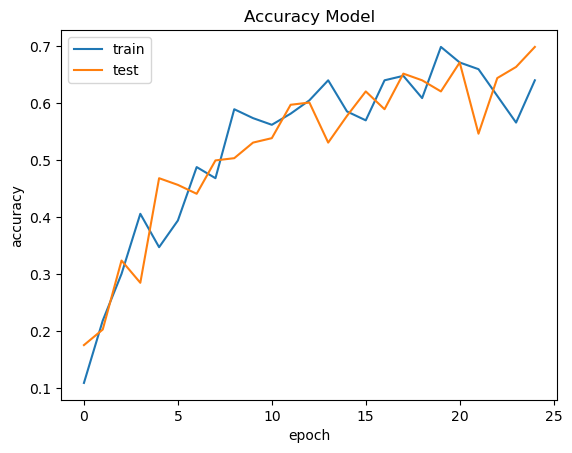

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

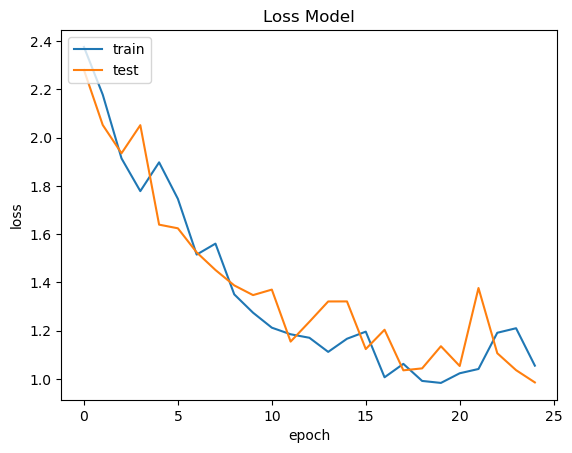

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()